# 3년간 비트코인과 다른 지수들의 상관관계 데이터 분석 및 알고리즘 적용

In [99]:
%matplotlib notebook
from datetime import datetime
import pandas as pd
import matplotlib as mpl
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt 
import FinanceDataReader as fdr
import seaborn as sns
from sklearn.preprocessing import minmax_scale
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
start = '2018'

FinanceDataReader를 통해 비트코인, 코스피, 금, 상해종합지수, 일본닛케이지수, S&P500지수, 원화환율, 유로 환율, 위엔 환율을 가져옵니다<br>
데이터의 시점은 2018년~2021/06/11까지입니다.

In [100]:
BTC = fdr.DataReader('BTC/USD',start,end) # 달러 비트코인

다른 지수들의 기준인 달러에 맞춰 비트코인의 달러 가격을 가져왔습니다.

In [101]:
ks11 = fdr.DataReader('KS11', start) # 코스피
ZG= fdr.DataReader('ZG',start) # 금 선물 (ICE)
SSEC = fdr.DataReader('SSEC', start) # 상해종합주가지수
NIKKEI225 = fdr.DataReader('JP225', start) # 일본 닛케이225 지수
sp = fdr.DataReader('US500', start) # S&P 500 지수 (NYSE)
usdkrw = fdr.DataReader('USD/KRW', start) # 달러 원화
usdeur = fdr.DataReader('USD/EUR', start) # 달러 유로화
usdcny = fdr.DataReader('USD/CNY', start) # 달러 위엔화
nasdaq = fdr.DataReader('IXIC', start) # 나스닥
chartlists = [ks11, nasdaq, ZG, SSEC, NIKKEI225, sp, usdkrw, usdeur, usdcny]
chartnames = ['ks11', 'nasdaq', 'ZG', 'SSEC', 'NIKKEI225', 'sp', 'usdkrw', 'usdeur', 'usdcny']

In [102]:
ks11.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2018-01-02,2479.65,2474.86,2481.02,2465.94,262200000.0,0.0049
2018-01-03,2486.35,2484.63,2493.40,2481.91,331100000.0,0.0027
2018-01-04,2466.46,2502.50,2502.50,2466.45,333840000.0,-0.0080
2018-01-05,2497.52,2476.85,2497.52,2475.51,308770000.0,0.0126
2018-01-08,2513.28,2510.70,2515.37,2494.18,311430000.0,0.0063


In [103]:
ZG.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2018-01-08,1407.4,1407.4,1407.4,1407.4,40.0,-0.0006
2018-01-11,1411.4,1411.4,1411.4,1411.4,10.0,0.0022
2018-01-12,1425.7,1425.7,1425.7,1425.7,10.0,0.0101
2018-01-16,1428.1,1428.1,1428.1,1428.1,10.0,0.0643
2018-01-17,1431.0,1431.0,1431.0,1431.0,30.0,0.0020


In [104]:
SSEC.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2018-01-02,3348.33,3314.03,3349.05,3314.03,2.023000e+10,0.0124
2018-01-03,3369.11,3347.74,3379.92,3345.29,2.138000e+10,0.0062
2018-01-04,3385.71,3371.00,3392.83,3365.30,2.070000e+10,0.0049
2018-01-05,3391.75,3386.46,3402.07,3380.24,2.131000e+10,0.0018
2018-01-08,3409.48,3391.55,3412.73,3384.56,2.362000e+10,0.0052


In [105]:
NIKKEI225.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2018-01-04,23506.33,23073.73,23506.33,23065.20,1.050000e+09,0.0326
2018-01-05,23714.53,23643.00,23730.47,23520.52,1.050000e+09,0.0089
2018-01-09,23849.99,23948.97,23952.61,23789.03,9.701700e+08,0.0057
2018-01-10,23788.20,23832.81,23864.76,23755.45,9.148800e+08,-0.0026
2018-01-11,23710.43,23656.39,23734.97,23601.84,8.628000e+08,-0.0033


In [106]:
sp.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2018-01-02,2695.81,2683.73,2695.89,2682.36,0.0,0.0083
2018-01-03,2713.06,2697.85,2714.37,2697.77,0.0,0.0064
2018-01-04,2723.99,2719.31,2729.29,2719.07,0.0,0.0040
2018-01-05,2743.15,2731.33,2743.45,2727.92,0.0,0.0070
2018-01-08,2747.71,2742.67,2748.51,2737.60,0.0,0.0017


In [107]:
usdkrw.head()

,Close,Open,High,Low,Change
Date,,,,,
2018-01-01,1066.60,1067.38,1067.80,1065.61,-0.0007
2018-01-02,1063.21,1066.60,1068.51,1059.97,-0.0032
2018-01-03,1064.80,1062.88,1068.16,1062.48,0.0015
2018-01-04,1062.28,1065.13,1069.31,1061.53,-0.0024
2018-01-05,1062.09,1061.83,1064.06,1060.20,-0.0002


In [108]:
usdeur.head()

,Close,Open,High,Low,Change
Date,,,,,
2018-01-01,0.8327,0.8333,0.8337,0.8325,-0.0010
2018-01-02,0.8293,0.8326,0.8334,0.8276,-0.0041
2018-01-03,0.8323,0.8293,0.8332,0.8286,0.0036
2018-01-04,0.8286,0.8323,0.8330,0.8272,-0.0044
2018-01-05,0.8313,0.8287,0.8320,0.8276,0.0033


In [109]:
usdcny.head()

,Close,Open,High,Low,Change
Date,,,,,
2018-01-01,6.5067,6.5067,6.5067,6.5067,0.0000
2018-01-02,6.4933,6.4963,6.5054,6.4920,-0.0021
2018-01-03,6.5030,6.4970,6.5126,6.4970,0.0015
2018-01-04,6.4933,6.5034,6.5111,6.4926,-0.0015
2018-01-05,6.4887,6.4813,6.4910,6.4794,-0.0007


In [110]:
nasdaq.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2018-01-02,7006.90,6937.65,7006.91,6924.08,462200000.0,0.0150
2018-01-03,7065.53,7017.07,7069.15,7016.70,483920000.0,0.0084
2018-01-04,7077.91,7089.50,7098.05,7072.38,493870000.0,0.0018
2018-01-05,7136.56,7105.74,7137.04,7097.08,476410000.0,0.0083
2018-01-08,7157.39,7135.38,7161.35,7124.09,497210000.0,0.0029


In [111]:
BTC.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2018-01-01,13444.9,13850.5,13921.5,12877.7,78430.0,-0.0293
2018-01-02,14754.1,13444.9,15306.1,12934.2,137730.0,0.0974
2018-01-03,15156.6,14754.1,15435.0,14579.7,106540.0,0.0273
2018-01-04,15180.1,15156.5,15408.7,14244.7,110970.0,0.0015
2018-01-05,16954.8,15180.1,17126.9,14832.4,141960.0,0.1169


비트코인은 2018-01-01부터 시작됩니다. 

## Data
Date: 다른 데이터들이 있는 시점입니다. <br>
Close: 그날의 종료가격(종가) <br>
Open: 그날의 시작가격(시가) <br>
High: 그날의 가장 높았던 가격(고가) <br>
Low: 그날의 가장 낮았던 가격(저가) <br>
Volume: 그날의 총 거래량<br>
Change: 오늘 시가와 오늘의 종가의 변동률

비트코인은 24시간 장이 열리지만 다른 거래소들은 빨간날과 주말 등 쉬는 날이 있기 때문에 모든 시점의 데이터가 있지 않습니다.<br>
거래량은 0으로 되어있거나 아예 없는경우도 있고 단일 차트에서 상승이나 하락을 예측할때 쓰기때문에 현 차트 상관관계 분석에서는 사용되지 않습니다.<br>
차트에서 시가는 전날의 종가이고, 고가와 저가는 잠시 있었던 부분이기때문에 현 차트 상관관계 분석에서는 사용되지 않습니다.<br>
여기서 사용할 컬럼은 종가와 변동률입니다.

<br>

<br>

<br>

<br>

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

<br>

## Chart Preprocessing 

In [112]:
def make_scale(chart):
    chart['scale'] = minmax_scale(chart['Close'], axis=0, copy=True)

비트코인의 가격이 다른 차트에 비해 상대적으로 너무 커서 차트를 겹칠 경우 다른 차트들이 너무 작아져 제대로 비교가 안되기 때문에 차트를 정규화 합니다.

In [113]:
BTC['scale'] = minmax_scale(BTC['Close'], axis=0, copy=True)

비트 코인의 종가를 정규화 시켜서 저장합니다.

In [114]:
BTC

,Close,Open,High,Low,Volume,Change,scale
Date,,,,,,,
2018-01-01,13444.9,13850.5,13921.5,12877.7,78430.0,-0.0293,0.169389
2018-01-02,14754.1,13444.9,15306.1,12934.2,137730.0,0.0974,0.191096
2018-01-03,15156.6,14754.1,15435.0,14579.7,106540.0,0.0273,0.197769
2018-01-04,15180.1,15156.5,15408.7,14244.7,110970.0,0.0015,0.198159
2018-01-05,16954.8,15180.1,17126.9,14832.4,141960.0,0.1169,0.227584
...,...,...,...,...,...,...,...
2021-06-07,33578.0,35815.4,36754.6,33410.1,119500.0,-0.0625,0.503203
2021-06-08,33382.9,33574.6,34047.8,31158.1,193540.0,-0.0058,0.499968
2021-06-09,37332.2,33385.5,37517.6,32428.6,209820.0,0.1183,0.565449


In [115]:
for chart in chartlists:
    make_scale(chart)

다른 차트들도 차트의 등락을 비교하기 쉽게 비트코인처럼 차트를 정규화 해줍니다.

<br><br><br>

## Chart Comparison

<IPython.core.display.Javascript object>


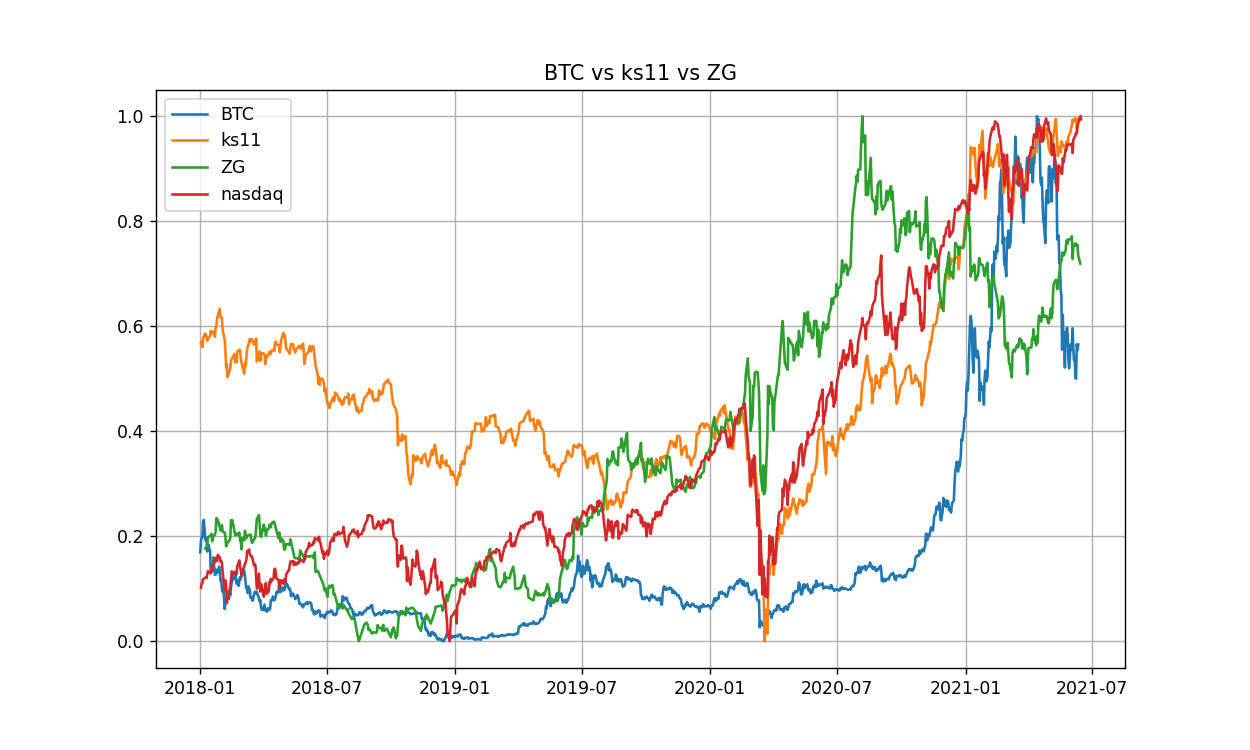

In [116]:
plt.figure(figsize=(10,6))

plt.plot(BTC['scale'],label='BTC')
plt.plot(ks11['scale'],label='ks11')
plt.plot(ZG['scale'], label = 'ZG')
plt.plot(nasdaq['scale'], label='nasdaq')
plt.title('BTC vs ks11 vs ZG')
plt.legend()
plt.grid(True)

plt.show()

차트 모양으로 봤을때 코스피와 비트코인은 등락폭은 다르나 같이 떨어지고 같이 올라가는 모양을 하고 있습니다.<br>
금이 오르면 비트코인이 떨어지고 반대로 비트코인이떨어지면 금이 내리는 것을 보아 금과 비트코인은 반비례 관계가 보입니다.

<IPython.core.display.Javascript object>


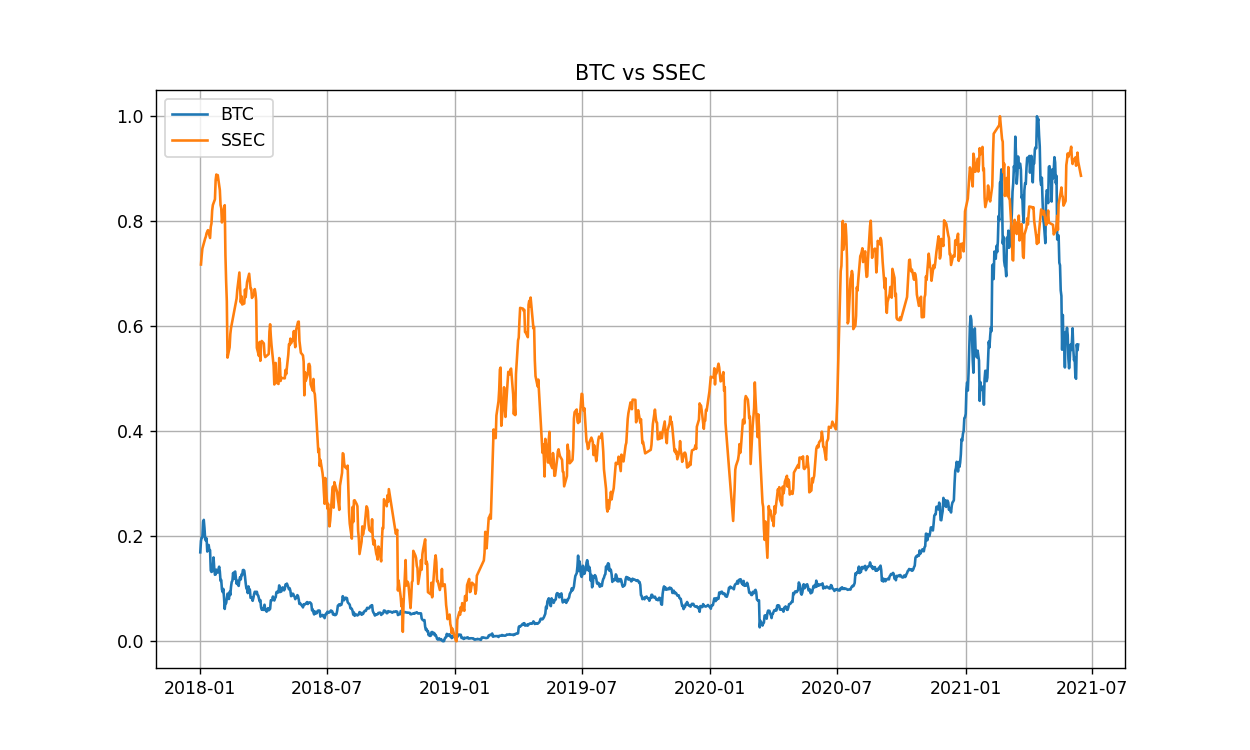

In [117]:
plt.figure(figsize=(10,6))

plt.plot(BTC['scale'],label='BTC')
plt.plot(SSEC['scale'], label='SSEC')
plt.title('BTC vs SSEC')
plt.legend()
plt.grid(True)
plt.show()

SSEC차트는 2021-01부터 비트코인의 급등과 함께 차트가 낮아지는것으로 보아 중국자본이 비트코인에 투자되었음을 예측할 수 있습니다.<br>
2021-05 이후 중국이 비트코인 시장을 견제하면서 중국자본이 빠져나가 비트코인이 감소하는것도 차트상 확인이 가능합니다.

<IPython.core.display.Javascript object>


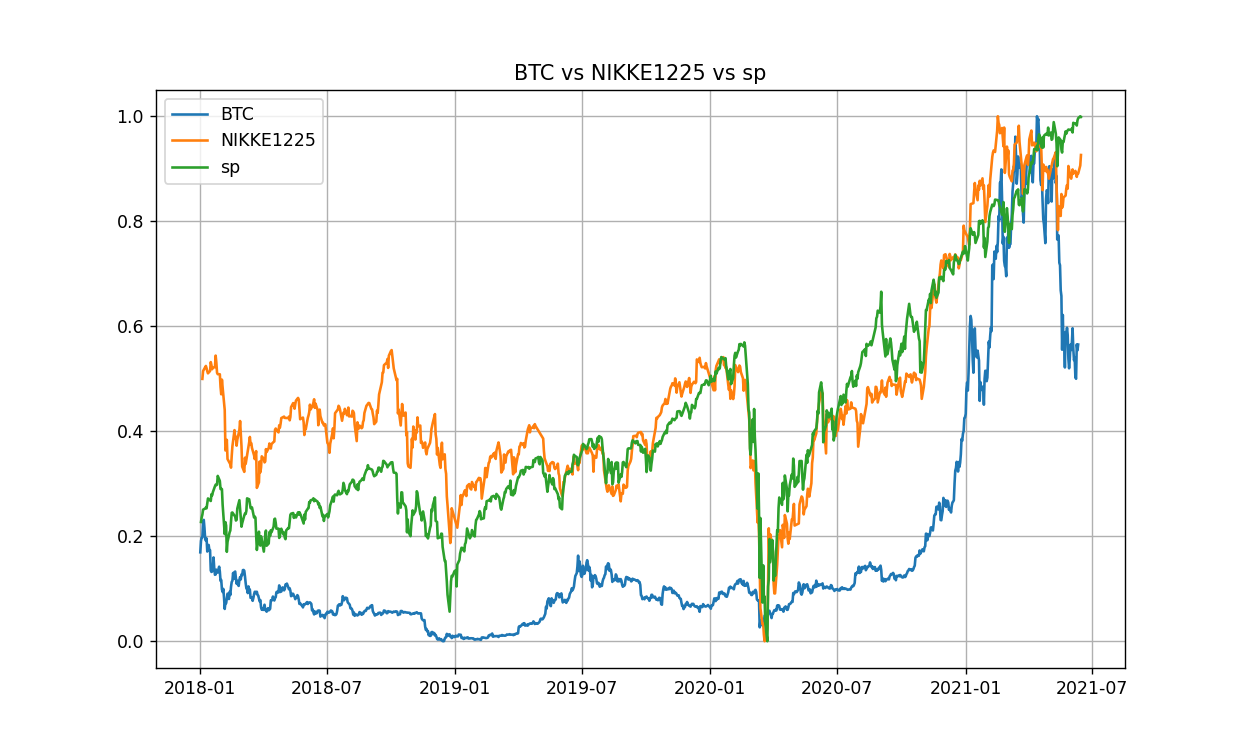

In [118]:
plt.figure(figsize=(10,6))

plt.plot(BTC['scale'],label='BTC')
plt.plot(NIKKEI225['scale'], label='NIKKE1225')
plt.plot(sp['scale'], label='sp')

plt.title('BTC vs NIKKE1225 vs sp')
plt.grid(True)
plt.legend()
plt.show()

sp와 NIKKE 차트는 거의 비슷한 차트를 그리고 있고, 등락폭은 다르지만 비트코인과 비슷한 성향이 보입니다.<br> 

<IPython.core.display.Javascript object>


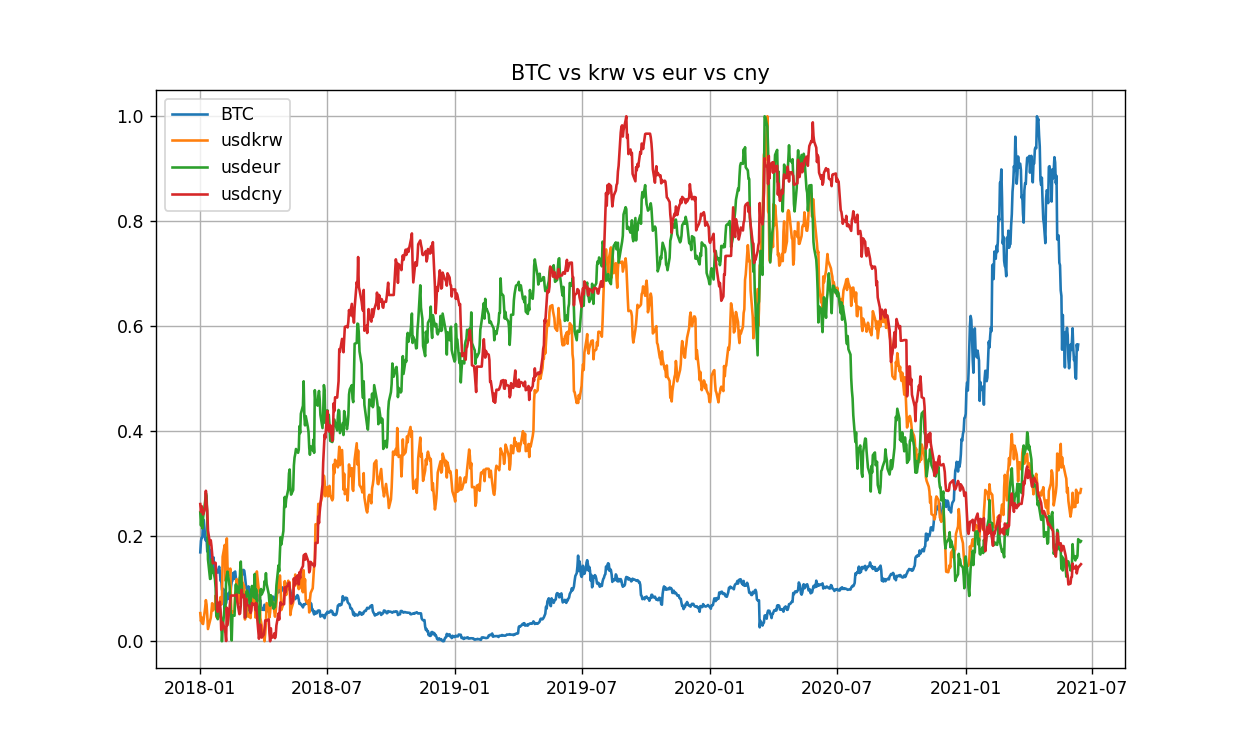

In [119]:
plt.figure(figsize=(10,6))

plt.plot(BTC['scale'],label='BTC')
plt.plot(usdkrw['scale'], label='usdkrw')
plt.plot(usdeur['scale'], label='usdeur')
plt.plot(usdcny['scale'], label='usdcny')

plt.title('BTC vs krw vs eur vs cny')
plt.grid(True)
plt.legend()
plt.show()

마지막으로 환율과 비트코인의 관계에선 눈으로만 봤을때 비트코인이 상승하는 시점과 환율이 하락하는 지점이 엇갈리는 모습으로 보아 반비례 관계로 보입니다.

<br><br>

# Heatmap

In [120]:
df1 = pd.DataFrame(BTC['Close'].values, index = BTC.index, columns = ['BTC'])

In [121]:
for chart, name in zip(chartlists, chartnames):
    df1[name] = chart['Close']

In [122]:
df1.head(n=10)

,BTC,ks11,nasdaq,ZG,SSEC,NIKKEI225,sp,usdkrw,usdeur,usdcny
Date,,,,,,,,,,
2018-01-01,13444.9,NaN,NaN,NaN,NaN,NaN,NaN,1066.60,0.8327,6.5067
2018-01-02,14754.1,2479.65,7006.90,NaN,3348.33,NaN,2695.81,1063.21,0.8293,6.4933
2018-01-03,15156.6,2486.35,7065.53,NaN,3369.11,NaN,2713.06,1064.80,0.8323,6.5030
2018-01-04,15180.1,2466.46,7077.91,NaN,3385.71,23506.33,2723.99,1062.28,0.8286,6.4933
2018-01-05,16954.8,2497.52,7136.56,NaN,3391.75,23714.53,2743.15,1062.09,0.8313,6.4887
2018-01-06,17172.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-07,16228.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-08,14976.2,2513.28,7157.39,1407.4,3409.48,NaN,2747.71,1068.86,0.8357,6.4998
2018-01-09,14778.5,2510.23,7163.58,NaN,3413.90,23849.99,2751.29,1071.97,0.8377,6.5297


df1에 모든 차트의 종가를 다 넣어줍니다. <br>
하지만 상품마다 거래하는 날짜가 다르기 때문에 NaN값이 많음을 알 수 있습니다.

In [123]:
df1.isnull().sum()

BTC            0
ks11         410
nasdaq       391
ZG           523
SSEC         422
NIKKEI225    423
sp           391
usdkrw       358
usdeur       358
usdcny       366
dtype: int64

In [124]:
df1[df1['ZG'].isnull()]

,BTC,ks11,nasdaq,ZG,SSEC,NIKKEI225,sp,usdkrw,usdeur,usdcny
Date,,,,,,,,,,
2018-01-01,13444.9,NaN,NaN,NaN,NaN,NaN,NaN,1066.60,0.8327,6.5067
2018-01-02,14754.1,2479.65,7006.90,NaN,3348.33,NaN,2695.81,1063.21,0.8293,6.4933
2018-01-03,15156.6,2486.35,7065.53,NaN,3369.11,NaN,2713.06,1064.80,0.8323,6.5030
2018-01-04,15180.1,2466.46,7077.91,NaN,3385.71,23506.33,2723.99,1062.28,0.8286,6.4933
2018-01-05,16954.8,2497.52,7136.56,NaN,3391.75,23714.53,2743.15,1062.09,0.8313,6.4887
...,...,...,...,...,...,...,...,...,...,...
2021-05-29,34584.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-30,35652.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-31,37298.6,3203.92,NaN,NaN,3615.48,28860.08,NaN,1106.58,0.8177,6.3688


null값이 제일 많은 금을 기준으로 null이 들어있는 row들을 살펴보면 금만 null인 경우도 있으나 다른 종목들과 같이 null인 경우가 대다수 인것같아 null값이 들어있는 row는 제거하도록 하겠습니다.

In [125]:
df1.dropna(inplace = True)

In [126]:
df1.isna().sum()

BTC          0
ks11         0
nasdaq       0
ZG           0
SSEC         0
NIKKEI225    0
sp           0
usdkrw       0
usdeur       0
usdcny       0
dtype: int64

## Close Heatmap

<IPython.core.display.Javascript object>


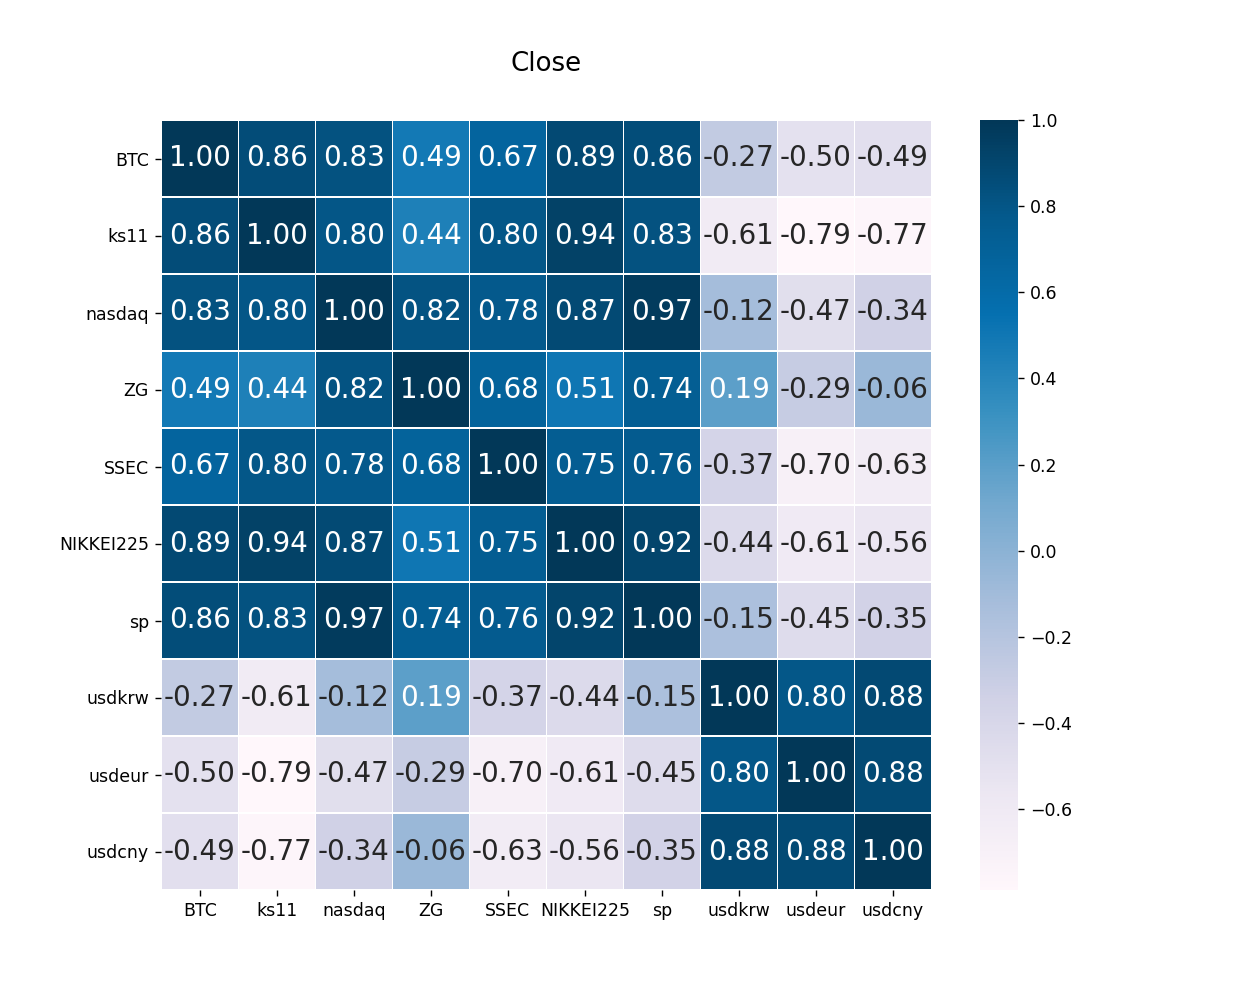

<AxesSubplot:title={'center':'Close'}>

In [127]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8)) 
plt.title("Close", y = 1.05, size = 15) 
sns.heatmap(df1.corr(), linewidths = 0.1, square = True, cmap = colormap, fmt = '.2f', linecolor = "white", annot = True, annot_kws = {"size" : 16})

 위에 그래프 모양에서 봤던것 처럼 코스피와 비트코인은 양의 관계를 갖고 있습니다.<br>
SP와 NIKKEI225도 비트코인과 밀접한 관계가 있어보입니다.<br>
환율과 관련된 세개의 상품은 비트코인과 음의 관계가 있어보입니다. <br>
비트코인이 상승할때 유로와 위엔화가 많이 감소 하는 것으로 보아 비트코인이 상승할때 위엔이나 유로로 환전해 두는것도 괜찮을것 같습니다.

## Change Heatmap

In [128]:
df2 = pd.DataFrame(BTC['Change'].values, index = BTC.index, columns = ['BTC'])

In [129]:
for chart, name in zip(chartlists, chartnames):
    df2[name] = chart['Change']

In [130]:
df2

,BTC,ks11,nasdaq,ZG,SSEC,NIKKEI225,sp,usdkrw,usdeur,usdcny
Date,,,,,,,,,,
2018-01-01,-0.0293,NaN,NaN,NaN,NaN,NaN,NaN,-0.0007,-0.0010,0.0000
2018-01-02,0.0974,0.0049,0.0150,NaN,0.0124,NaN,0.0083,-0.0032,-0.0041,-0.0021
2018-01-03,0.0273,0.0027,0.0084,NaN,0.0062,NaN,0.0064,0.0015,0.0036,0.0015
2018-01-04,0.0015,-0.0080,0.0018,NaN,0.0049,0.0326,0.0040,-0.0024,-0.0044,-0.0015
2018-01-05,0.1169,0.0126,0.0083,NaN,0.0018,0.0089,0.0070,-0.0002,0.0033,-0.0007
...,...,...,...,...,...,...,...,...,...,...
2021-06-07,-0.0625,0.0037,0.0049,0.0036,0.0021,0.0027,-0.0008,0.0001,-0.0018,0.0003
2021-06-08,-0.0058,-0.0013,0.0031,-0.0023,-0.0054,-0.0019,0.0002,0.0064,0.0013,0.0006
2021-06-09,0.1183,-0.0097,-0.0009,0.0006,0.0032,-0.0035,-0.0018,-0.0019,-0.0006,-0.0021


In [131]:
df2.isna().sum()

BTC            0
ks11         410
nasdaq       391
ZG           523
SSEC         422
NIKKEI225    423
sp           391
usdkrw       358
usdeur       358
usdcny       366
dtype: int64

In [132]:
df2.dropna(inplace = True)

In [133]:
df2.isna().sum()

BTC          0
ks11         0
nasdaq       0
ZG           0
SSEC         0
NIKKEI225    0
sp           0
usdkrw       0
usdeur       0
usdcny       0
dtype: int64

<IPython.core.display.Javascript object>


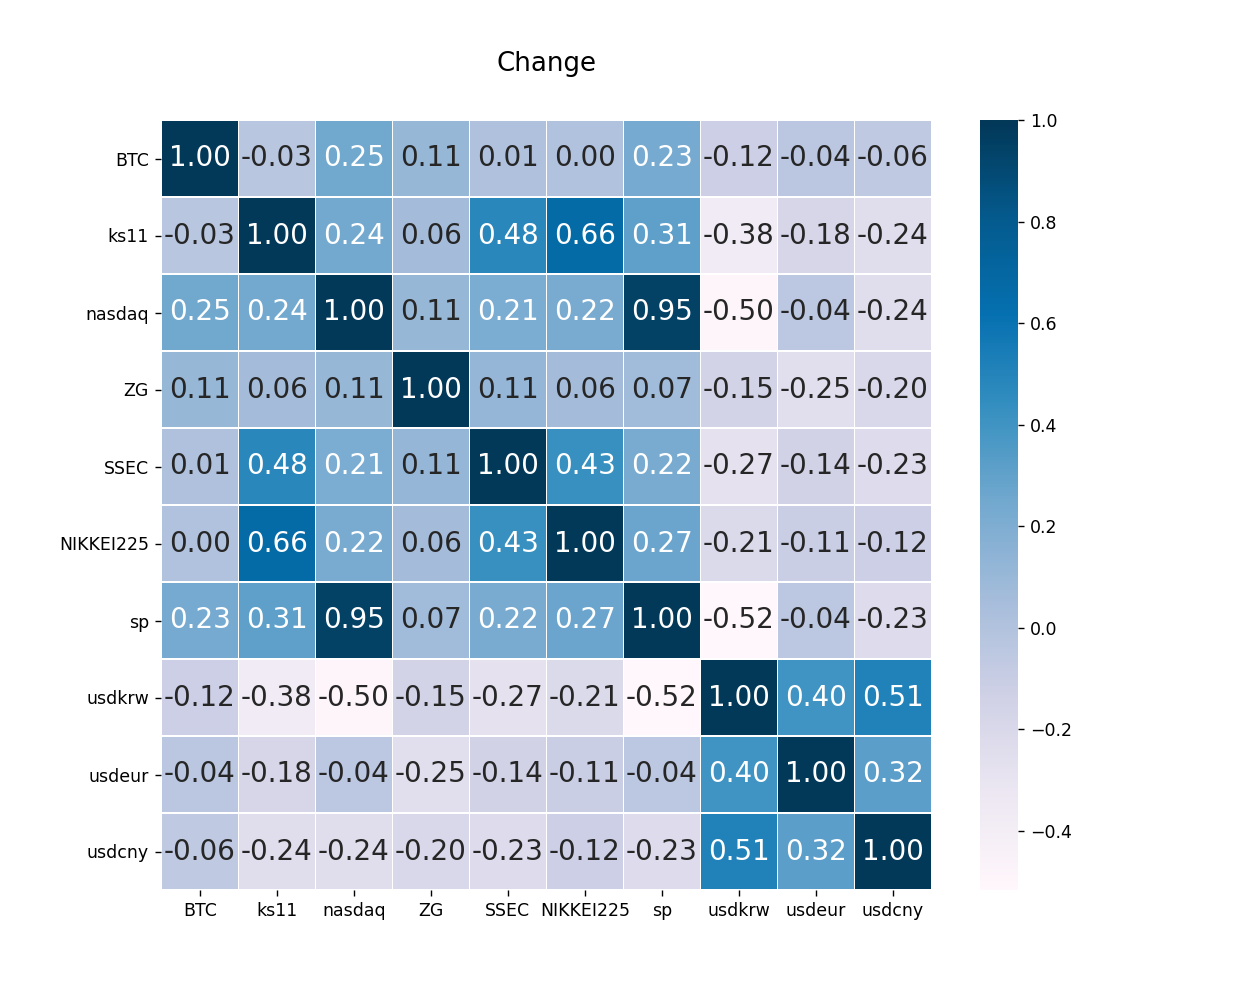

<AxesSubplot:title={'center':'Change'}>

In [134]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8)) 
plt.title("Change", y = 1.05, size = 15) 
sns.heatmap(df2.corr(), linewidths = 0.1, square = True, cmap = colormap, fmt = '.2f', 
            linecolor = "white", annot = True, annot_kws = {"size" : 16})

Close Heatmap과 마찬가지로 데이터를 정제해주고 히드맵을 해본 결과 비트코인의 변동률과 다른 종목의 변동률의 관계를 잘 보이지 않습니다.<br>
다르게 코스피와 NIKKEI225변동률영향이 서로 제일 크다는 것을 알 수 있습니다.

# Classification ML

In [135]:
BTC['fluctuations'] = -1
BTC['fluctuations'].loc[BTC['Change'] > 0] = 1
BTC['fluctuations'].loc[BTC['Change'] == 0] = 0
BTC

,Close,Open,High,Low,Volume,Change,scale,fluctuations
Date,,,,,,,,
2018-01-01,13444.9,13850.5,13921.5,12877.7,78430.0,-0.0293,0.169389,-1
2018-01-02,14754.1,13444.9,15306.1,12934.2,137730.0,0.0974,0.191096,1
2018-01-03,15156.6,14754.1,15435.0,14579.7,106540.0,0.0273,0.197769,1
2018-01-04,15180.1,15156.5,15408.7,14244.7,110970.0,0.0015,0.198159,1
2018-01-05,16954.8,15180.1,17126.9,14832.4,141960.0,0.1169,0.227584,1
...,...,...,...,...,...,...,...,...
2021-06-07,33578.0,35815.4,36754.6,33410.1,119500.0,-0.0625,0.503203,-1
2021-06-08,33382.9,33574.6,34047.8,31158.1,193540.0,-0.0058,0.499968,-1
2021-06-09,37332.2,33385.5,37517.6,32428.6,209820.0,0.1183,0.565449,1


분류 학습을 할 수 있게 다른 차트들의 영향으로 오늘 상승인지 하락인지 예상할 수 있게 1은 상승, -1은 하락, 0은 유지라는 기호를 만들어줍니다.

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # 선형회귀
from sklearn.svm import SVC # 서포트벡터머신
from sklearn.tree import DecisionTreeClassifier # 디시젼트리
from sklearn.neighbors import KNeighborsClassifier # Knn
from sklearn.ensemble import RandomForestClassifier # 랜덤포레스트

In [137]:
df1['BTC'] = BTC['fluctuations']
df1

,BTC,ks11,nasdaq,ZG,SSEC,NIKKEI225,sp,usdkrw,usdeur,usdcny
Date,,,,,,,,,,
2018-01-11,-1,2487.91,7211.78,1411.4,3425.34,23710.43,2767.56,1065.58,0.8311,6.4958
2018-01-12,1,2496.42,7261.06,1425.7,3428.94,23653.82,2786.24,1059.99,0.8206,6.4610
2018-01-16,-1,2521.74,7223.69,1428.1,3436.59,23951.81,2776.42,1064.65,0.8156,6.4440
2018-01-17,-1,2515.43,7298.28,1431.0,3444.67,23868.34,2802.56,1067.36,0.8206,6.4343
2018-01-18,1,2515.81,7296.05,1419.0,3474.75,23763.37,2798.03,1070.69,0.8171,6.4203
...,...,...,...,...,...,...,...,...,...,...
2021-06-07,-1,3252.12,13881.72,1898.8,3599.54,29019.24,4226.52,1110.62,0.8203,6.3963
2021-06-08,-1,3247.83,13924.91,1894.4,3580.11,28963.56,4227.26,1117.72,0.8214,6.4000
2021-06-09,1,3216.18,13911.75,1895.5,3591.40,28860.80,4219.55,1115.61,0.8209,6.3865


In [138]:
x = df1[chartnames].values # 다른 차트들의 종가
y = df1['BTC'].values # 이날 상승,하락 기호

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0) # 분류해줍니다.

In [139]:
models = []
models.append(('LR',LogisticRegression()))
models.append(('SVM', SVC()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))

predicts = []
results = []
names = []
i = 0
for name, model in models:
    model.fit(X_train, y_train)
    res = model.score(X_test, y_test)
    results.append((name, res))
    names.append(name)
    msg = "%s: %f" %(name,res)
    predicts.append((name, model.predict(df1[chartnames].tail())))
    print(msg)

LR: 0.462025
SVM: 0.455696
DT: 0.531646
RF: 0.449367


DecisionTree를 제외하고는 정확도가 50퍼가 안나와 상당히 저조한 결과입니다.

In [140]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

<IPython.core.display.Javascript object>


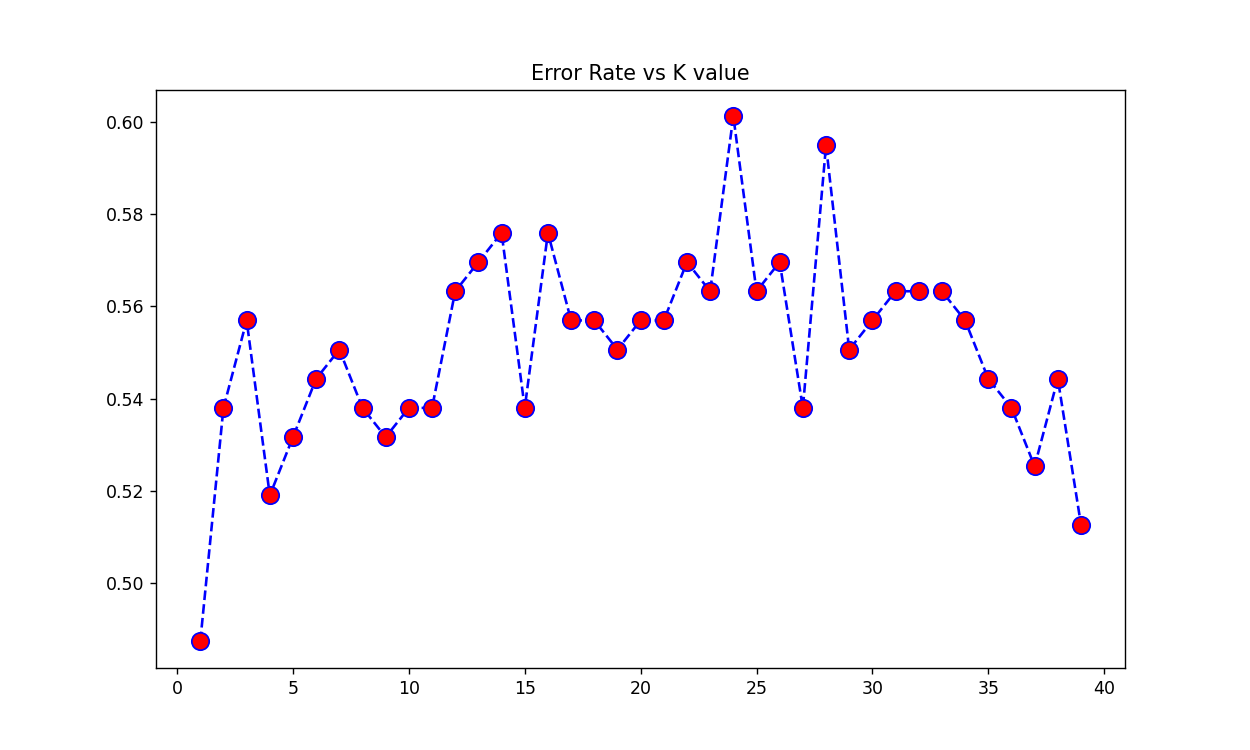

In [141]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='--', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K value')
plt.xlabel = ('K')
plt.ylabel = ('Error Rate')

KNN에서는 1일때 제일 에러율이 낮게 나옵니다.

In [142]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
results.append(('knn',knn.score(X_test,y_test)))
predicts.append(('knn', knn.predict(df1[chartnames].tail())))

In [143]:
df1.tail()

,BTC,ks11,nasdaq,ZG,SSEC,NIKKEI225,sp,usdkrw,usdeur,usdcny
Date,,,,,,,,,,
2021-06-07,-1,3252.12,13881.72,1898.8,3599.54,29019.24,4226.52,1110.62,0.8203,6.3963
2021-06-08,-1,3247.83,13924.91,1894.4,3580.11,28963.56,4227.26,1117.72,0.8214,6.4000
2021-06-09,1,3216.18,13911.75,1895.5,3591.40,28860.80,4219.55,1115.61,0.8209,6.3865
2021-06-10,-1,3224.64,14020.33,1896.4,3610.86,28958.56,4239.18,1112.32,0.8215,6.3929
2021-06-11,1,3249.32,14069.42,1879.6,3589.75,28948.73,4247.44,1116.40,0.8258,6.3967


df1의 마지막 5개와 머신러닝의 예측 결과를 비교해 보기위해 tail을 출력해봤습니다.

In [144]:
predicts

[('LR', array([-1, -1, -1, -1, -1], dtype=int64)),
 ('SVM', array([1, 1, 1, 1, 1], dtype=int64)),
 ('DT', array([-1, -1,  1, -1, -1], dtype=int64)),
 ('RF', array([ 1, -1,  1,  1,  1], dtype=int64)),
 ('knn', array([-1, -1,  1, -1, -1], dtype=int64))]

In [145]:
results

[('LR', 0.4620253164556962),
 ('SVM', 0.45569620253164556),
 ('DT', 0.5316455696202531),
 ('RF', 0.44936708860759494),
 ('knn', 0.5126582278481012)]

제일 높은 ML은 KNN이고 DT,Knn을 제외한 나머지 모델은 정확도가 상당히 낮음을 알 수 있습니다.<br>
tail을 예상해본 결과 하나의 숫자로만 예측이 나와 하나의 숫자로만 나온것인지 확인 해보는 작업이 필요합니다.

<IPython.core.display.Javascript object>


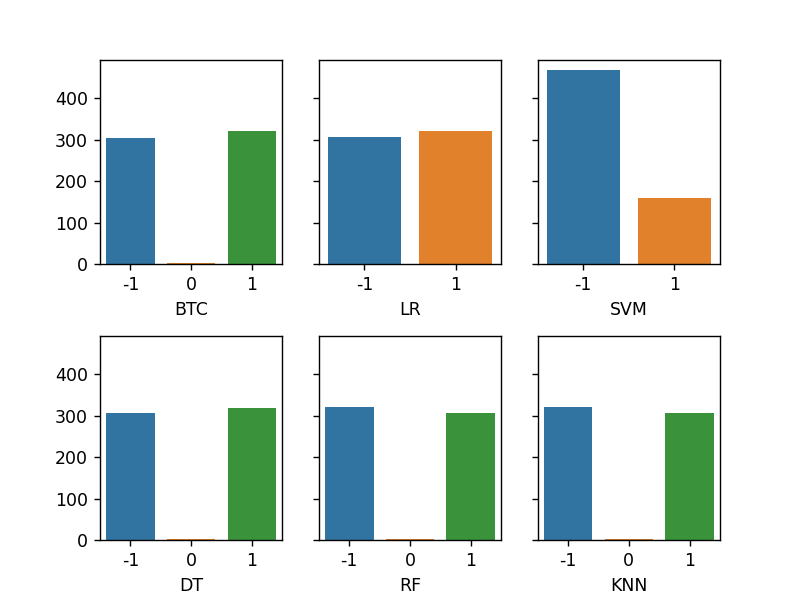

Text(0, 0.5, '')

In [146]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3,sharey=True)
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)
sns.countplot('BTC', data = df1, ax=ax1)
ax1.set_ylabel('')

data = pd.DataFrame(models[0][1].predict(df1[chartnames]), columns=['LR'])
sns.countplot('LR', data = data, ax=ax2)
ax2.set_ylabel('')

data = pd.DataFrame(models[1][1].predict(df1[chartnames]), columns=['SVM'])
sns.countplot('SVM', data = data, ax=ax3)
ax3.set_ylabel('')

data = pd.DataFrame(models[2][1].predict(df1[chartnames]), columns=['DT'])
sns.countplot('DT', data = data, ax=ax4)
ax4.set_ylabel('')

data = pd.DataFrame(models[3][1].predict(df1[chartnames]), columns=['RF'])
sns.countplot('RF', data = data, ax=ax5)
ax5.set_ylabel('')

data = pd.DataFrame(knn.predict(df1[chartnames]), columns=['KNN'])
sns.countplot('KNN', data = data, ax=ax6)
ax6.set_ylabel('')

SVM을 제외한 다른 모델들은 하나의 숫자만으로 예측된게 아닌것을 확인 할 수 있습니다.<br>
그리고 이진 분류로는 주식의 등락을 예측하기 어려워 보입니다.

 # Regression ML

In [147]:
df1['BTC'] = BTC['Close']
df1

,BTC,ks11,nasdaq,ZG,SSEC,NIKKEI225,sp,usdkrw,usdeur,usdcny
Date,,,,,,,,,,
2018-01-11,13535.4,2487.91,7211.78,1411.4,3425.34,23710.43,2767.56,1065.58,0.8311,6.4958
2018-01-12,13886.7,2496.42,7261.06,1425.7,3428.94,23653.82,2786.24,1059.99,0.8206,6.4610
2018-01-16,11362.0,2521.74,7223.69,1428.1,3436.59,23951.81,2776.42,1064.65,0.8156,6.4440
2018-01-17,11192.3,2515.43,7298.28,1431.0,3444.67,23868.34,2802.56,1067.36,0.8206,6.4343
2018-01-18,11245.4,2515.81,7296.05,1419.0,3474.75,23763.37,2798.03,1070.69,0.8171,6.4203
...,...,...,...,...,...,...,...,...,...,...
2021-06-07,33578.0,3252.12,13881.72,1898.8,3599.54,29019.24,4226.52,1110.62,0.8203,6.3963
2021-06-08,33382.9,3247.83,13924.91,1894.4,3580.11,28963.56,4227.26,1117.72,0.8214,6.4000
2021-06-09,37332.2,3216.18,13911.75,1895.5,3591.40,28860.80,4219.55,1115.61,0.8209,6.3865


In [148]:
x = df1[chartnames].values # 다른 차트들의 종가
y = df1['BTC'].values # 비트코인 가격

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0) # 분류해줍니다.

회귀 분석으로 금액을 예측해 보기위해 종가 가격으로 바꿔줍니다.

In [149]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [150]:
lin_svr = SVR(kernel='linear', C=0.5)
lin_svr.fit(X_train, y_train)

poly_svr = SVR(kernel='poly', C=1000,degree=3)
poly_svr.fit(X_train, y_train)

rbf_svr = SVR(kernel='rbf', C=6000)
rbf_svr.fit(X_train, y_train)

a = lin_svr.score(X_test,y_test)
b = poly_svr.score(X_test,y_test)
c = rbf_svr.score(X_test,y_test)
print(a)
print(b)
print(c)

0.8362920506289249
0.8312898890439182
0.8394925287351593


SVR 모델의 파라미터를 적당히 바꿔주어 정확도를 80이상으로 맞춰줍니다.

In [151]:
import xgboost as xg
xgb_model = xg.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.08, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.75,
             tree_method='exact', validate_parameters=1, verbosity=None)

xgboost모델을 사용해서 똑같은 데이터로 fit해줍니다.

In [152]:
print(xgb_model.score(X_test, y_test))

0.9877898900130174


xg모델이 뭔가 이상하게 과하게 잘 맞습니다.

In [153]:
a = xgb_model.predict(df1[chartnames].tail())
a

array([37186.414, 33428.055, 37277.49 , 35988.777, 32980.93 ],
      dtype=float32)

In [154]:
df1['BTC'].tail()

Date
2021-06-07    33578.0
2021-06-08    33382.9
2021-06-09    37332.2
2021-06-10    36649.4
2021-06-11    37314.6
Name: BTC, dtype: float64

df1의 맨뒤 5개만 비교해본 결과가 어느정도 예상 범위안에 잘 들어가 있는것을 알 수 있습니다..

<IPython.core.display.Javascript object>


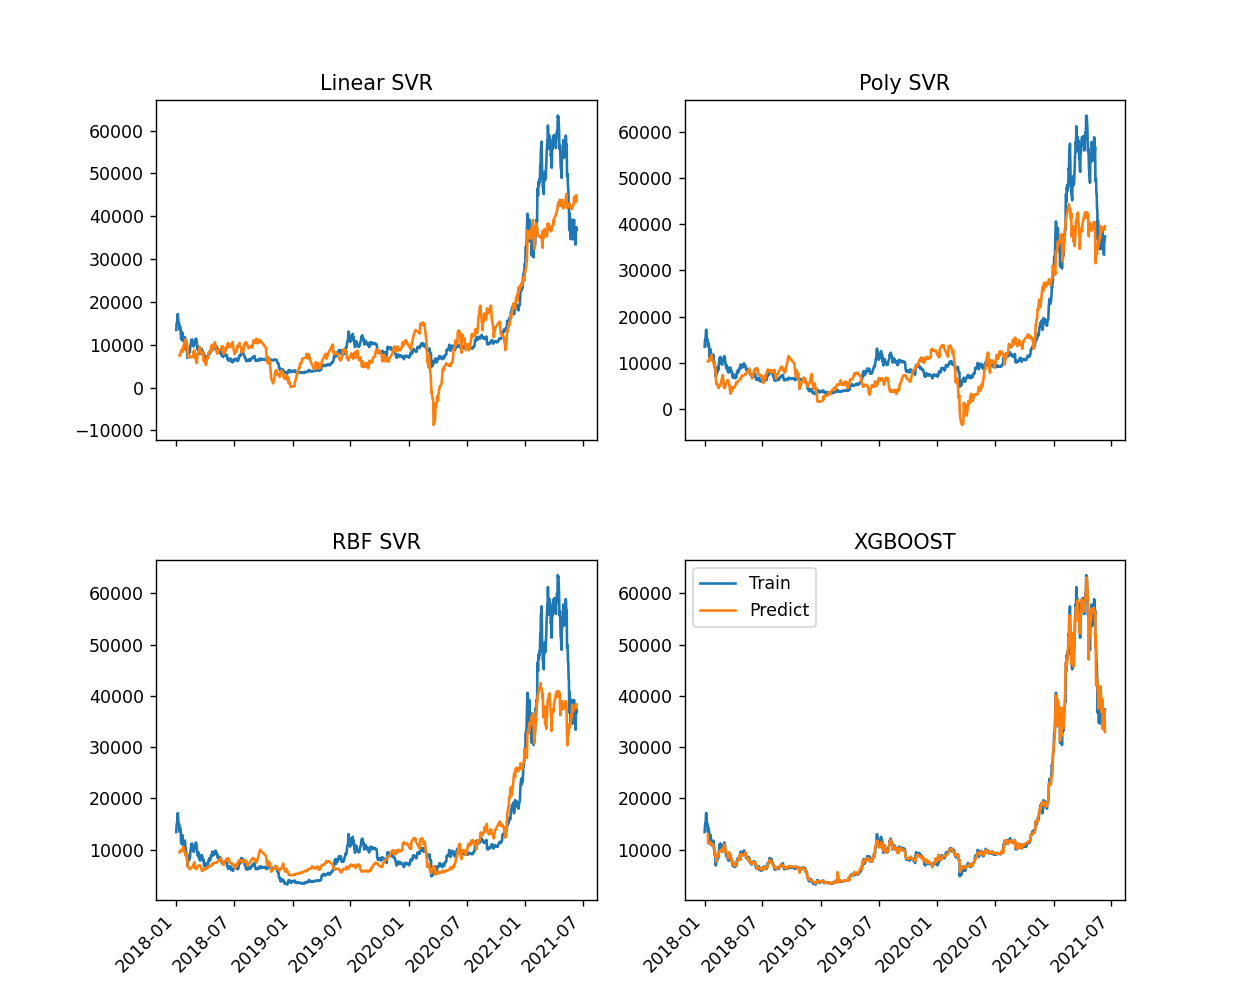

In [155]:
lin_prd = lin_svr.predict(df1[chartnames])
poly_prd = poly_svr.predict(df1[chartnames])
rbf_prd = rbf_svr.predict(df1[chartnames])
xgb_prd = xgb_model.predict(df1[chartnames])

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(10, 8))
fig.autofmt_xdate(rotation=45)
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)
ax1.plot(BTC['Close'],label = 'Train')
ax1.plot(df1.index, lin_prd,label = 'Predict')
ax1.set_title('Linear SVR')

ax2.plot(BTC['Close'],label = 'Train')
ax2.plot(df1.index, poly_prd,label = 'Predict')
ax2.set_title('Poly SVR')

ax3.plot(BTC['Close'],label = 'Train')
ax3.plot(df1.index, rbf_prd,label = 'Predict')
ax3.set_title('RBF SVR')

ax4.plot(BTC['Close'],label = 'Train')
ax4.plot(df1.index, xgb_prd,label = 'Predict')
ax4.set_title('XGBOOST')

plt.legend()

plt.show()


RBF SVR모델이 그나마 비슷하게 그려졌는데 급상승한 구간에서 모든 SVR모델이 예측에 틀린것을 볼 수 있습니다.<br>
그에 비해 XGBOOST모델은 거의 완벽하게 그려졌습니다. <br>
XGBOOST모델의 성능이 매우 좋은 결과 조금 더 시간이 지난 다음에 예측을 시켜 볼 필요가 있어보입니다.

<IPython.core.display.Javascript object>


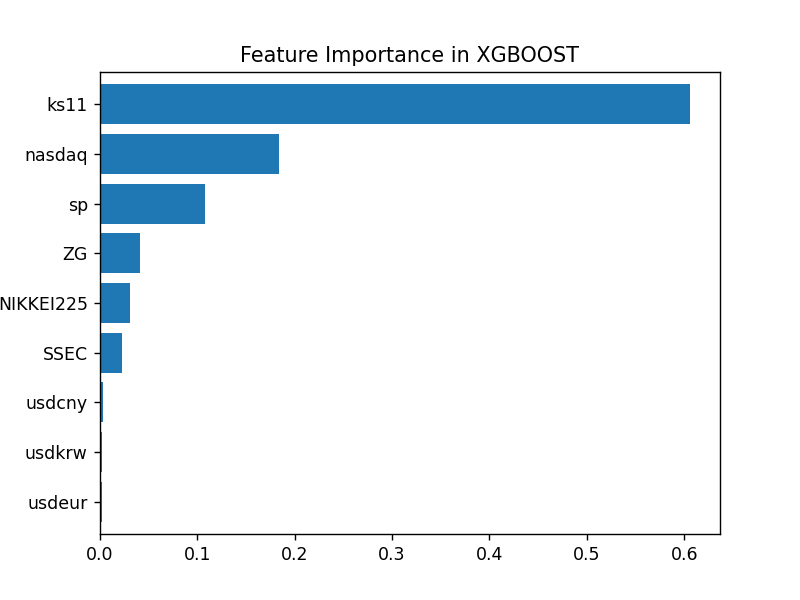

In [156]:
plt.figure()
pd.Series(xgb_model.feature_importances_,df1.columns[1:]).sort_values(ascending=True).plot.barh(width=0.8)
plt.title('Feature Importance in XGBOOST')
plt.show()

제일 정확도가 높게나온 XGBOOST모델로 특성간 중요도를 파악해본 결과 코스피가 비트코인시장에 가장 밀접한 관계가 있음을 알 수 있습니다.